In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

Using TensorFlow backend.


In [2]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [4]:
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
print(folders)

['Datasets/Train\\Aman', 'Datasets/Train\\Ayush']


In [5]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [6]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/5
2/2 [==============================] - 359s 179s/step - loss: 0.6542 - accuracy: 0.6500 - val_loss: 1.0070 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 385s 192s/step - loss: 0.4959 - accuracy: 0.7000 - val_loss: 0.9111 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 384s 192s/step - loss: 0.2550 - accuracy: 0.9000 - val_loss: 0.5731 - val_accuracy: 0.7000
Epoch 4/5
2/2 [==============================] - 395s 198s/step - loss: 0.1257 - accuracy: 0.9500 - val_loss: 0.6575 - val_accuracy: 0.7000
Epoch 5/5
2/2 [==============================] - 358s 179s/step - loss: 0.1011 - accuracy: 0.9500 - val_loss: 0.5488 - val_accuracy: 0.6000


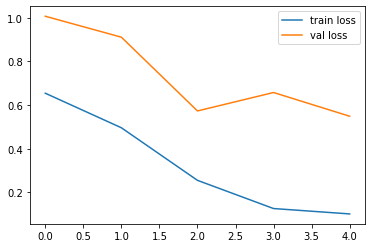

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
from keras.models import load_model

model.save('face.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
from keras.preprocessing import image
img = image.load_img("Arsh.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("face.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Arnav")
else:
    print('Arsh')

In [ ]:
from keras.preprocessing import image
img = image.load_img("Arnav.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("face.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Arnav")
else:
    print('Arsh')